<a href="https://colab.research.google.com/github/niteshkumar0205/machine_learning_projects/blob/main/Day_12_knn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
data = pd.read_csv("/content/black_f.csv")

In [114]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [115]:
data.shape

(550068, 12)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [117]:
data.describe

<bound method NDFrame.describe of         User_ID Product_ID  ... Product_Category_3 Purchase
0       1000001  P00069042  ...                NaN     8370
1       1000001  P00248942  ...               14.0    15200
2       1000001  P00087842  ...                NaN     1422
3       1000001  P00085442  ...                NaN     1057
4       1000002  P00285442  ...                NaN     7969
...         ...        ...  ...                ...      ...
550063  1006033  P00372445  ...                NaN      368
550064  1006035  P00375436  ...                NaN      371
550065  1006036  P00375436  ...                NaN      137
550066  1006038  P00375436  ...                NaN      365
550067  1006039  P00371644  ...                NaN      490

[550068 rows x 12 columns]>

In [118]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

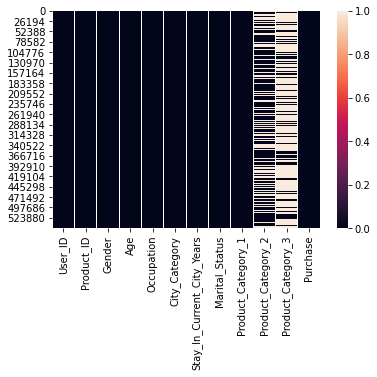

In [119]:
sns.heatmap(data.isnull())

In [120]:
data.drop(["Product_Category_3","User_ID"],axis=1,inplace=True)

In [121]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [122]:
data["Product_Category_2"].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [123]:
data["Product_Category_2"].fillna(0,inplace= True)

In [124]:
data["Product_Category_2"].value_counts()

0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [125]:
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of male and female')

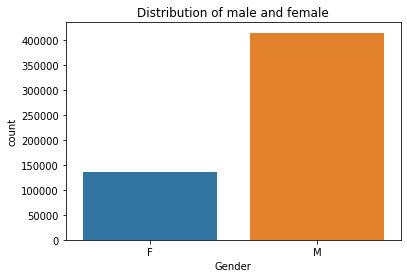

In [126]:
gender = sns.countplot(data["Gender"])
gender.set_title("Distribution of male and female")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


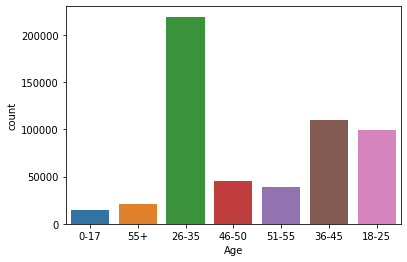

In [127]:
sns.countplot(data["Age"])

In [128]:
data["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

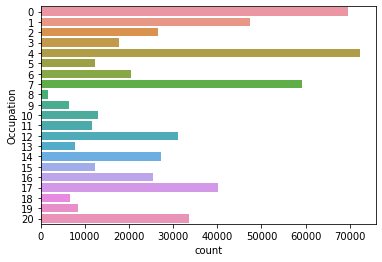

In [129]:
sns.countplot(y = data["Occupation"] )

In [130]:
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()


data["Product_ID"] = le_encoder.fit_transform(data["Product_ID"])

data["Age"] = le_encoder.fit_transform(data["Age"])

In [131]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,F,0,10,A,2,0,3,0.0,8370
1,2376,F,0,10,A,2,0,1,6.0,15200
2,852,F,0,10,A,2,0,12,0.0,1422
3,828,F,0,10,A,2,0,12,14.0,1057
4,2734,M,6,16,C,4+,0,8,0.0,7969


In [132]:
data["City_Category"] = le_encoder.fit_transform(data["City_Category"])
data["Stay_In_Current_City_Years"] = le_encoder.fit_transform(data["Stay_In_Current_City_Years"])


In [133]:
data.head(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,F,0,10,0,2,0,3,0.0,8370
1,2376,F,0,10,0,2,0,1,6.0,15200
2,852,F,0,10,0,2,0,12,0.0,1422
3,828,F,0,10,0,2,0,12,14.0,1057
4,2734,M,6,16,2,4,0,8,0.0,7969
5,1831,M,2,15,0,3,0,1,2.0,15227
6,1745,M,4,7,1,2,1,1,8.0,19215
7,3320,M,4,7,1,2,1,1,15.0,15854
8,3604,M,4,7,1,2,1,1,16.0,15686
9,2631,M,2,20,0,1,1,8,0.0,7871


In [134]:
data["Gender"] = data["Gender"].map({"F":0,"M":1})

In [135]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,0,0,10,0,2,0,3,0.0,8370
1,2376,0,0,10,0,2,0,1,6.0,15200
2,852,0,0,10,0,2,0,12,0.0,1422
3,828,0,0,10,0,2,0,12,14.0,1057
4,2734,1,6,16,2,4,0,8,0.0,7969


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 42.0 MB


In [137]:
x=data.drop("Gender",axis = 1)

y = data["Gender"]

In [138]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
k_model = KNeighborsClassifier()
                          

In [141]:
k_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [142]:
tr_pred = k_model.predict(x_train)
ts_pred = k_model.predict(x_test)

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Training accuracy:",accuracy_score(y_train,tr_pred))
print("Testing accuracy:",accuracy_score(y_test,ts_pred))

Training accuracy: 0.7887972117689529
Testing accuracy: 0.7094066815738603


In [144]:
tr_acc = []
ts_acc = []
for i in range(5,17,2):

  k_model = KNeighborsClassifier()
  k_model.fit(x_train,y_train)

  tr_pred = k_model.predict(x_train)
  ts_pred = k_model.predict(x_test)

  tr_acc.append(accuracy_score(y_train,tr_pred))
  ts_acc.append(accuracy_score(y_test,ts_pred))



In [145]:
tr_acc

[0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529,
 0.7887972117689529]

In [146]:
ts_acc

[0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603,
 0.7094066815738603]

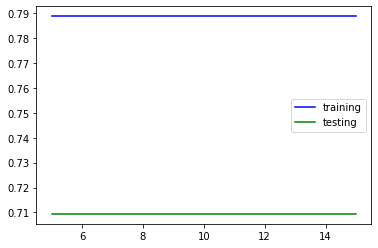

In [147]:
x_ = [x for x in range(5,17,2)]
plt.plot(x_,tr_acc,label = "Training",color = "blue")
plt.plot(x_,ts_acc,label = "Testing",color = "green")
plt.legend()
plt.show()